In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from sklearn import metrics


In [8]:
# predictions were made on a data scientist job description from linkedin
predictions1 = pd.read_csv('data/predictions1.csv')
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   extractions      238 non-null    object 
 1   prediction_prob  238 non-null    float64
 2   actual           238 non-null    int64  
 3   possibility      238 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 7.6+ KB


In [11]:
# predictions made on a sales associate job description from linkedin
predictions2 = pd.read_csv('data/predictions2.csv')
predictions2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   extractions      249 non-null    object 
 1   prediction_prob  249 non-null    float64
 2   actual           249 non-null    int64  
 3   flag             249 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 7.9+ KB


In [12]:
# converts the probability with a threshold of 50% creating a new column for better analysis
predictions1['predicted_skill'] = (predictions1['prediction_prob'] >= 0.5).astype('int8')
predictions2['predicted_skill'] = (predictions2['prediction_prob'] >= 0.5).astype('int8')

In [14]:
# there is a difference in column names 
predictions2.columns

Index(['extractions', 'prediction_prob', 'actual', 'flag', 'predicted_skill'], dtype='object')

# Data Scientist Job Description Predictions

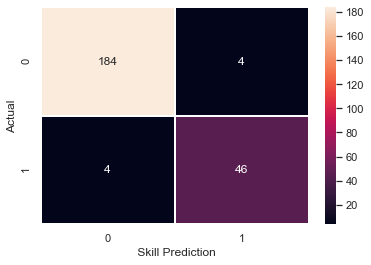

In [15]:
confusion_matrix = pd.crosstab(predictions1.actual, predictions1.predicted_skill, rownames = ['Actual'], colnames = [' Skill Prediction'])
sns.heatmap(confusion_matrix, linewidths = 1, fmt= 'g', annot=True);

In [16]:
print(metrics.classification_report(predictions1.actual, predictions1.predicted_skill))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       188
           1       0.92      0.92      0.92        50

    accuracy                           0.97       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.97      0.97      0.97       238



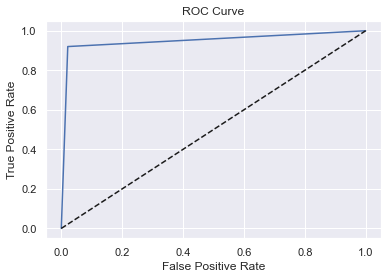

In [17]:
fpr, tpr, thresholds =  metrics.roc_curve(predictions1.actual, predictions1.predicted_skill)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve');

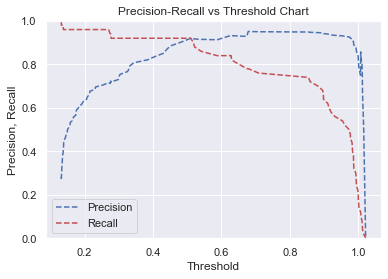

In [18]:
#  check the trhesholds and see of there is a chance in alteration for better accuracy
precision, recall, thresholds = metrics.precision_recall_curve(predictions1.actual, predictions1.prediction_prob) 
 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1]);

### Examples

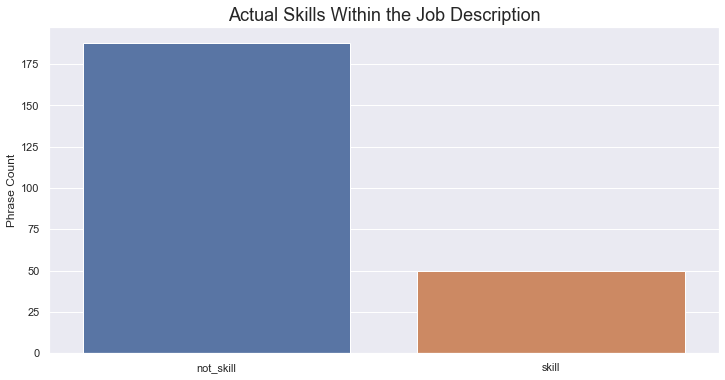

In [29]:
# number of actual skills in the job description 
predictions1['actual_cat'] = np.where(predictions1.actual == 1, 'skill', 'not_skill')
plt.figure(figsize = (12,6))
sns.barplot(x = predictions1.actual_cat.value_counts().index, y = predictions1.actual_cat.value_counts())
plt.title('Actual Skills Within the Data Science Job Description', size = 18)
plt.ylabel('Phrases Count');

In [35]:
# good examples
predictions1.extractions.loc[predictions1.predicted_skill == 1]


0              the hr data science analyst implements
1                                    analytics models
9                                     analytic models
11                 industry standard machine learning
12                           data visualization tools
15                 the hr data science analyst builds
16                                        runs models
24                                                sql
25                                     r/python/scala
27                                        correlation
35                                          analytics
37                              data-driven decisions
38                                visualization tools
40                         fact-based decision making
41                           visualization techniques
44                           impactful visualizations
47                                      data accuracy
48                                          integrity
50                          

In [37]:
# Flagged Instances; those that were on the border/ questionable
predictions1.loc[predictions1.possibility == 1]

,extractions,prediction_prob,actual,possibility,predicted_skill,actual_cat
1,analytics models,0.911366,1,1,1,skill
16,runs models,0.518036,1,1,1,skill
27,correlation,0.587660,0,1,1,not_skill
46,communication reviews visualizations,0.481877,0,1,0,not_skill
47,data accuracy,0.882590,1,1,1,skill
91,some advanced knowledge,0.450898,0,1,0,not_skill
114,hr data,0.325425,0,1,0,not_skill
153,business change decision-making processes,0.207223,0,1,0,not_skill
158,of risk management fundamentals,0.276609,1,1,0,skill
159,advanced knowledge,0.708994,1,1,1,skill


### Probabilities

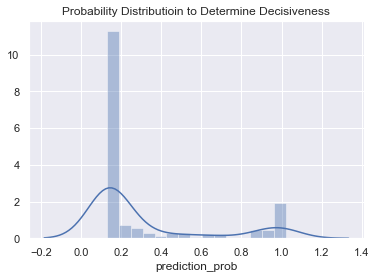

In [43]:
# checking the decisiveness of the model
sns.distplot(predictions1.prediction_prob);
plt.title('Probability Distributioin to Determine Decisiveness');

In [45]:
# low probabilities; those the model were not very sure of 
predictions1.loc[(predictions1.prediction_prob > .49) & (predictions1.prediction_prob < .75)]


,extractions,prediction_prob,actual,possibility,predicted_skill,actual_cat
16,runs models,0.518036,1,1,1,skill
27,correlation,0.587660,0,1,1,not_skill
44,impactful visualizations,0.628786,1,0,1,skill
101,workday knowledge,0.651791,1,0,1,skill
122,science analyst builds,0.629805,1,0,1,skill
159,advanced knowledge,0.708994,1,1,1,skill
175,leverages industry standard machine learning,0.510833,1,1,1,skill
179,develops data features,0.678675,1,0,1,skill
183,using sql,0.540884,1,0,1,skill
200,demonstrates visualization techniques,0.522034,1,0,1,skill


# Sales Associate Job Descriptions Predictions

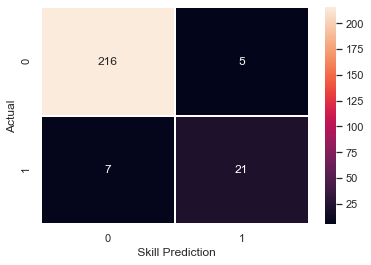

In [46]:
confusion_matrix = pd.crosstab(predictions2.actual, predictions2.predicted_skill, rownames = ['Actual'], colnames = [' Skill Prediction'])
sns.heatmap(confusion_matrix, linewidths = 1, fmt= 'g', annot=True);

In [47]:
print(metrics.classification_report(predictions2.actual, predictions2.predicted_skill))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       221
           1       0.81      0.75      0.78        28

    accuracy                           0.95       249
   macro avg       0.89      0.86      0.88       249
weighted avg       0.95      0.95      0.95       249



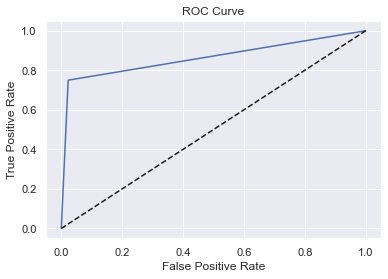

In [48]:
fpr, tpr, thresholds =  metrics.roc_curve(predictions2.actual, predictions2.predicted_skill)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve');

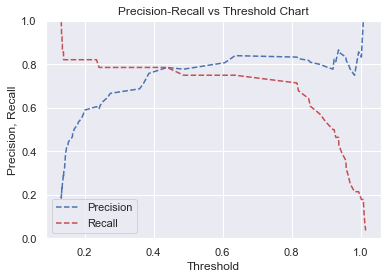

In [49]:
#  check the trhesholds and see of there is a chance in alteration for better accuracy
precision, recall, thresholds = metrics.precision_recall_curve(predictions2.actual, predictions2.prediction_prob) 
 
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1]);

### Altered threshold for improvement

In [50]:
predictions2['altered_threshold'] = (predictions2['prediction_prob'] >= 0.42).astype('int8')

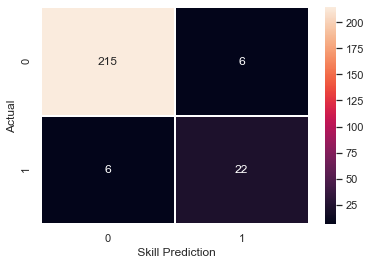

In [51]:
confusion_matrix = pd.crosstab(predictions2.actual, predictions2.altered_threshold, rownames = ['Actual'], colnames = [' Skill Prediction'])
sns.heatmap(confusion_matrix, linewidths = 1, fmt= 'g', annot=True);

In [52]:
print(metrics.classification_report(predictions2.actual, predictions2.altered_threshold))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       221
           1       0.79      0.79      0.79        28

    accuracy                           0.95       249
   macro avg       0.88      0.88      0.88       249
weighted avg       0.95      0.95      0.95       249



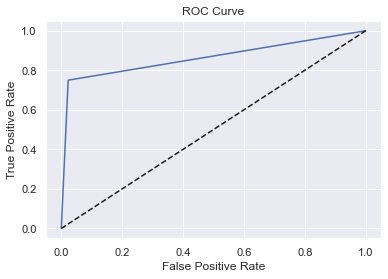

In [53]:
fpr, tpr, thresholds =  metrics.roc_curve(predictions2.actual, predictions2.predicted_skill)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve');

### Examples

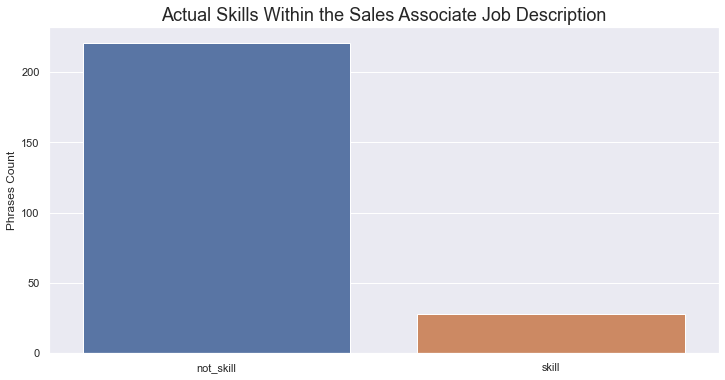

In [56]:
# number of actual skills in the job description 
predictions2['actual_cat'] = np.where(predictions2.actual == 1, 'skill', 'not_skill')
plt.figure(figsize = (12,6))
sns.barplot(x = predictions2.actual_cat.value_counts().index, y = predictions2.actual_cat.value_counts())
plt.title('Actual Skills Within the Sales Associate Job Description', size = 18)
plt.ylabel('Phrases Count');

In [58]:
# good examples
predictions2.extractions.loc[predictions2.predicted_skill == 1]

2                         ample experience
60                    strong communication
61                         problem solving
62                       analytical skills
63               strong negotiation skills
66                     excellent attention
68                                accuracy
69         excellent organizational skills
72                           good judgment
77                                    hvac
81                              schematics
86                                   excel
87                                 outlook
88                                bluebeam
92     exceptional customer service skills
94                                patience
95                         professionalism
98                               eagerness
116                                 cotati
121                                      k
133                                    lmc
137                  with ample experience
141                            marketplace
163        

In [59]:
# Flagged Instances; those that were on the border/ questionable
predictions1.loc[predictions1.possibility == 1]

,extractions,prediction_prob,actual,possibility,predicted_skill,actual_cat
1,analytics models,0.911366,1,1,1,skill
16,runs models,0.518036,1,1,1,skill
27,correlation,0.587660,0,1,1,not_skill
46,communication reviews visualizations,0.481877,0,1,0,not_skill
47,data accuracy,0.882590,1,1,1,skill
91,some advanced knowledge,0.450898,0,1,0,not_skill
114,hr data,0.325425,0,1,0,not_skill
153,business change decision-making processes,0.207223,0,1,0,not_skill
158,of risk management fundamentals,0.276609,1,1,0,skill
159,advanced knowledge,0.708994,1,1,1,skill


### Probabilities

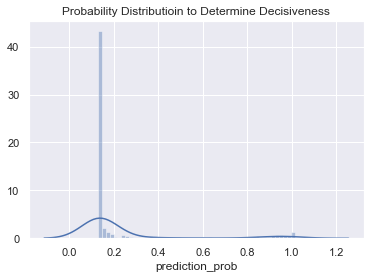

In [60]:
# checking the decisiveness of the model
sns.distplot(predictions2.prediction_prob);
plt.title('Probability Distributioin to Determine Decisiveness');

In [61]:
# low probabilities; those the model were not very sure of 
predictions2.loc[(predictions2.prediction_prob > .49) & (predictions2.prediction_prob < .75)]


,extractions,prediction_prob,actual,flag,predicted_skill,altered_threshold,actual_cat
2,ample experience,0.636218,1,0,1,1,skill
116,cotati,0.606532,0,0,1,1,not_skill
